In [2]:
import pandas as pd

file_path = "스킨_토너_reviews.csv"
df = pd.read_csv(file_path, encoding='utf-8-sig')

In [3]:
# Step 1: 기능별 키워드 정의 (속성 사전)
aspect_keywords = {
    '미백': ['미백', '톤업', '하얘짐', '화이트닝'],
    '보습': ['보습', '촉촉', '수분', '건조하지', '속당김', '수분감'],
    '트러블': ['트러블', '여드름', '자극', '진정', '붉어짐', '뾰루지', '민감'],
    '보호': ['자외선', '차단', '보호막', '방어', '먼지차단', '피부보호'],
    '노화방지': ['주름', '탄력', '노화', '안티에이징', '처짐', '리프팅']
}

# 확인용 출력
aspect_keywords

{'미백': ['미백', '톤업', '하얘짐', '화이트닝'],
 '보습': ['보습', '촉촉', '수분', '건조하지', '속당김', '수분감'],
 '트러블': ['트러블', '여드름', '자극', '진정', '붉어짐', '뾰루지', '민감'],
 '보호': ['자외선', '차단', '보호막', '방어', '먼지차단', '피부보호'],
 '노화방지': ['주름', '탄력', '노화', '안티에이징', '처짐', '리프팅']}

In [4]:
# 2) 감성 키워드 정의
positive_words = ['좋다', '좋아요', '촉촉하다', '만족', '개선', '진정됐다', '괜찮다', '흡수']
negative_words = ['별로', '자극적', '트러블났다', '건조하다', '따갑다', '효과없다', '불편하다', '뒤집어짐']

In [5]:
def label_review(text):
    labels = {'미백': None, '보습': None, '트러블': None,'보호': None, '노화방지': None}
    for aspect, keywords in aspect_keywords.items():
        if any(keyword in str(text) for keyword in keywords):
            if any(pword in str(text) for pword in positive_words):
                labels[aspect] = '긍정'
            elif any(nword in str(text) for nword in negative_words):
                labels[aspect] = '부정'
            else:
                labels[aspect] = '중립'
    return labels
    
# 라벨링 적용
df['라벨'] = df['리뷰내용'].apply(label_review)
print(df[['리뷰내용', '라벨']].head(10))

                                                리뷰내용  \
0  다이소 안개분사 스프레이안에 내용물을 담아서 뿌려서 쓰는게 화장솜에 적셔서 닦는거보...   
1                  좋아요! 순하고 촉촉하고 토너는 늘 이거만 쓰고 있어요 ㅎㅎ   
2  일단 지성한테 되게 잘 맞는 것 같아요 진짜 끈적임 아예 없고 수분감만 낭낭한 느낌...   
3  이게 속수분 잡아주는데 되게 좋은 토너라길래 샀었는데 1개만 샀는데도 용량이 엄청나...   
4                 괜찬ㄹ게 잘 쓰고 있습니다\n향이 좀 있어요 나쁘진않아요 ㅎㅎ   
5  이게 정말 속건조에 좋다길래 한 번 사봤어요 전 건성에 가까운 복합성이라 항상 에센...   
6  토너로 사용했고 향은 미미하게 있어요.\n물보다 약간 점도 높은 제형입니다.\n수분...   
7           닦토하고 팩으로도 잘 사용 중인 토너에여..! 여러 통 째 사용 중이에요   
8                매우매우매우 물임 그냥 그냥 수분 채우는 정도로 사용하면 될 듯   
9  가격값하는 토너 추천해달란 말 들을때 자주 이야기하는 토너인데요 이번에도 친구에게 ...   

                                                  라벨  
0  {'미백': None, '보습': '중립', '트러블': None, '보호': No...  
1  {'미백': None, '보습': '긍정', '트러블': None, '보호': No...  
2  {'미백': None, '보습': '긍정', '트러블': None, '보호': No...  
3  {'미백': None, '보습': '긍정', '트러블': None, '보호': No...  
4  {'미백': None, '보습': None, '트러블': None, '보호': No...  
5  {'미백': None, '보습': None, '트러블': None, '보호': No... 

In [6]:
file_paths = {
    "아이크림": "아이크림_reviews.csv",
    "에센스_세럼_앰플": "에센스_세럼_앰플_reviews.csv",
    "크림": "크림_reviews.csv"
}

# 동일한 라벨링 함수 사용
def label_dataframe(file_path):
  if file_path.lower().endswith('.csv'):
        df = pd.read_csv(file_path, encoding='utf-8-sig')
        df['라벨'] = df['리뷰내용'].apply(label_review)
        return df

# 각 파일에 대해 라벨링 진행
labeled_dfs = {}
for name, path in file_paths.items():
    labeled_dfs[name] = label_dataframe(path)

In [7]:
#라벨링 확인  
import pandas as pd

for name, df in labeled_dfs.items():
    print(f"— {name} —")
    # 1) 전체 행·열 개수
    print("Shape:", df.shape)
    # 2) ‘리뷰내용’ 대비 ‘라벨’ 샘플 3개
    print(df[['리뷰내용','라벨']].head(3).to_dict(orient='records'))
    
    # 3) 속성별 None(미검출) 개수 확인
    labels_df = df['라벨'].apply(pd.Series)
    print("결측(미라벨) 개수:")
    print(labels_df.isnull().sum())
    
    print()  # 빈 줄


— 아이크림 —
Shape: (32106, 4)
[{'리뷰내용': '많이 발라도 비립종 안 올라오는 아이크림!\n웃을 때 눈주름 생기기 시작한 거 알아채고 바르기 시작해서 벌써 3통째인데 주름개선 효과도 확실! 화장하고 웃을 때 눈끼임이 덜해요. 이미 유명한 제품인데에는 이유가 있는 듯해요. 그리고 아이크림이랑 나이트크림 같이 사용해주면 다음날 진짜 얼굴이 팽팽해져있어요b 아침에는 얼굴이 부어서 더 그렇게 느낄 수도 있는데 다른 제품 쓸 때에는 못 느낀 팽팽함이에요', '라벨': {'미백': None, '보습': None, '트러블': None, '보호': None, '노화방지': '긍정'}}, {'리뷰내용': '유세린 하이알루론 아이크림\n\n향이 독해서 목에만 바르는 정도입니다\n눈시림있어요\n유세린특유의 향이 진해서 꼭 테스트 하시고 사세요\n미백주름 기능성. 큰효과는 없고\n오래전에 사보고 안쓴 브랜드중 하나입니다\n\n국내 화장품이 성분더좋고 주름이나 미백 함량이 높고 순한성분 브랜드가 워낙. 많아서\n이젠 해외 브랜드는 방부제나 성분이나 화학성분 ㆍ알러지일으키는 성분 많아서 안써요\n\n@통장지키자 템입니다@\n\n올영에 아이크림 괜찬은거 너무많고 올영외에도\n중소기업제품 너무많아요\n이제 국산제품 기초는 아무리 백화점 최고가 제품이랑\n비교해도 국산이 좋탑니다', '라벨': {'미백': '중립', '보습': None, '트러블': None, '보호': None, '노화방지': '중립'}}, {'리뷰내용': '사실 주름이없어지고 탄력이생기고 이런건 전혀없습니다만 저자극이라는점이 제일 만족이큽니다~~', '라벨': {'미백': None, '보습': None, '트러블': '긍정', '보호': None, '노화방지': '긍정'}}]
결측(미라벨) 개수:
미백      31056
보습      22322
트러블     25482
보호      31874
노화방지    22542
dtype: int64

— 에센스_세럼_앰플 —
Shape: (46326, 

In [8]:
# 모든 파일 라벨링 적용 (5가지 기능 포함)
all_files = {
    "스킨_토너": "스킨_토너_reviews.csv",
    "아이크림": "아이크림_reviews.csv",
    "에센스_세럼_앰플": "에센스_세럼_앰플_reviews.csv",
    "크림": "크림_reviews.csv"
}    
# 모든 데이터를 하나로 병합하여 라벨링 적용
all_labeled = []
for name, path in all_files.items():
    df = pd.read_csv(path, encoding='utf-8-sig')
    df['카테고리'] = name
    df['라벨'] = df['리뷰내용'].apply(label_review)
    all_labeled.append(df)
df_all = pd.concat(all_labeled, ignore_index=True)
print(df_all.shape)


(165136, 5)


In [9]:
import pandas as pd

# 1) 속성 리스트와 극성 리스트
aspects    = list(aspect_keywords.keys())         # ['미백','보습','트러블','보호','노화방지']
polarities = ['긍정','부정','중립']

# 2) 벡터 컬럼명 조합
label_columns = [f"{a}_{p}" for a in aspects for p in polarities]
# ➞ ['미백_긍정','미백_부정','미백_중립','보습_긍정', … , '노화방지_중립']

# 3) 벡터 변환 함수 정의
def fast_convert_label_to_vector(label_series):
    result = []
    for label in label_series:
        # 기본값 0으로 채워진 딕셔너리
        vector = {col: 0 for col in label_columns}
        # 딕셔너리 형태(label_review 반환값)라면
        if isinstance(label, dict):
            for aspect, polarity in label.items():
                key = f"{aspect}_{polarity}"
                if key in vector:
                    vector[key] = 1
        result.append(vector)
    return pd.DataFrame(result)

# 4) 실제 변환해서 원본에 붙이기
vector_df = fast_convert_label_to_vector(df_all['라벨'])
df_vectorized = pd.concat([df_all, vector_df], axis=1)

# 5) 결과 확인
print(df_vectorized.shape)        # (원본 행 수, 원본 열 수 + 5*3 벡터 열 수)
print(df_vectorized[label_columns].head())


(165136, 20)
   미백_긍정  미백_부정  미백_중립  보습_긍정  보습_부정  보습_중립  트러블_긍정  트러블_부정  트러블_중립  보호_긍정  \
0      0      0      0      0      0      1       0       0       0      0   
1      0      0      0      1      0      0       0       0       0      0   
2      0      0      0      1      0      0       0       0       0      0   
3      0      0      0      1      0      0       0       0       0      0   
4      0      0      0      0      0      0       0       0       0      0   

   보호_부정  보호_중립  노화방지_긍정  노화방지_부정  노화방지_중립  
0      0      0        0        0        0  
1      0      0        0        0        0  
2      0      0        0        0        0  
3      0      0        0        0        0  
4      0      0        0        0        0  


In [10]:
from sklearn.model_selection import train_test_split

# 텍스트(X)와 라벨 매트릭스(Y) 분리
X = df_vectorized['리뷰내용'].astype(str)
Y = df_vectorized[label_columns].values  # (N, 15) 형태

# 80% 학습, 20% 검증
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
train_shape = X_train.shape
test_shape = Y_test.shape
train_shape,test_shape

((132108,), (33028, 15))

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_len    = 100

# 1) 토크나이저 생성·학습
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# 2) 텍스트 → 시퀀스로 변환
seq_train = tokenizer.texts_to_sequences(X_train)
seq_test  = tokenizer.texts_to_sequences(X_test)

# 3) 패딩
X_train_pad = pad_sequences(seq_train, maxlen=max_len, padding='post')
X_test_pad  = pad_sequences(seq_test,  maxlen=max_len, padding='post')


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_columns), activation='sigmoid')  # 멀티 라벨
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(1e-3),
    metrics=['accuracy']
)

history = model.fit(
    X_train_pad, Y_train,
    validation_data=(X_test_pad, Y_test),
    epochs=5,
    batch_size=32
)


Epoch 1/5
4129/4129 [==============================] - 34s 8ms/step - loss: 0.1403 - accuracy: 0.2796 - val_loss: 0.1056 - val_accuracy: 0.3506
Epoch 2/5
4129/4129 [==============================] - 31s 7ms/step - loss: 0.1004 - accuracy: 0.3567 - val_loss: 0.0766 - val_accuracy: 0.5033
Epoch 3/5
4129/4129 [==============================] - 31s 7ms/step - loss: 0.0676 - accuracy: 0.4878 - val_loss: 0.0525 - val_accuracy: 0.5090
Epoch 4/5
4129/4129 [==============================] - 31s 7ms/step - loss: 0.0525 - accuracy: 0.4872 - val_loss: 0.0474 - val_accuracy: 0.5134
Epoch 5/5
4129/4129 [==============================] - 31s 7ms/step - loss: 0.0440 - accuracy: 0.4989 - val_loss: 0.0441 - val_accuracy: 0.5267


In [13]:
# 1) 토크나이저 저장
import pickle
with open('tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f)

# 2) 모델 저장
model.save('lstm_model2.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         98816     
 l)                                                              
                                                                 
 attention (Attention)       (None, 128)               128       
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                             

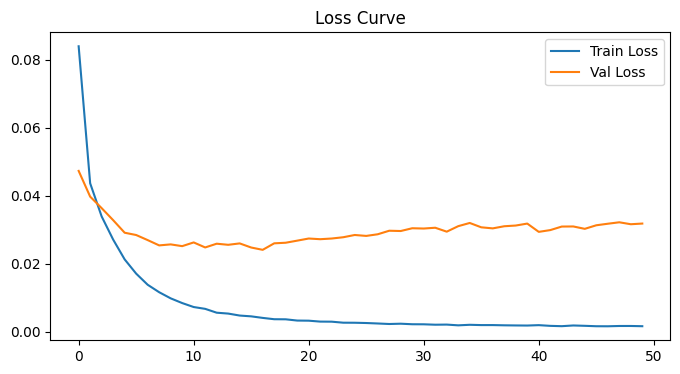

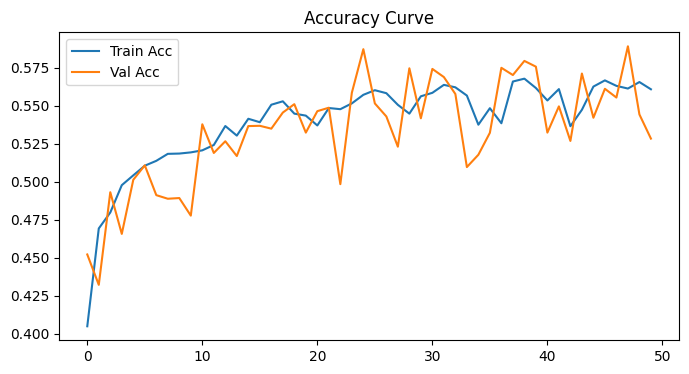

1033/1033 [==============================] - 5s 5ms/step - loss: 0.0318 - accuracy: 0.5284
Test Loss: 0.0318, Test Acc: 0.5284


In [14]:
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, Layer
from tensorflow.keras.models import Model
import tensorflow as tf

# 1) 어텐션 레이어 정의
class Attention(Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def build(self, input_shape):
        # 히든 유닛 차원만큼의 가중치 벡터 W (shape = [hidden_size, 1])
        self.W = self.add_weight(shape=(input_shape[-1], 1),
                                 initializer='glorot_uniform',
                                 trainable=True)

    def call(self, x):
        # x: (batch, seq_len, hidden_size)
        e = tf.matmul(x, self.W)             # (batch, seq_len, 1): 각 타임스텝 중요도 점수
        α = tf.nn.softmax(e, axis=1)         # (batch, seq_len, 1): 확률 분포로 변환
        # 가중합: 각 타임스텝 벡터 x * α를 시퀀스 차원에서 합산
        context = tf.reduce_sum(x * α, axis=1)  # (batch, hidden_size)
        return context

# 2) 모델 구조
inputs = Input(shape=(max_len,))                      # 시퀀스 길이 입력
x = Embedding(vocab_size, 128, input_length=max_len)(inputs)
# 양방향 LSTM: 앞과 뒤 문맥 모두 학습
x = Bidirectional(LSTM(64, return_sequences=True))(x)  # (batch, seq_len, 128)
x = Attention()(x)                                     # (batch, 128)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(len(label_columns), activation='sigmoid')(x)  # 멀티라벨 시그모이드

model = Model(inputs, outputs)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# 3) 모델 구조 확인
model.summary()

# 4) 학습 (fit)
history = model.fit(
    X_train_pad,           # 패딩된 학습 시퀀스
    Y_train,               # (N, 15) 멀티라벨 타깃
    validation_data=(X_test_pad, Y_test),
    epochs=50,             # 필요에 따라 조정
    batch_size=32
)

# 5) 학습 결과 시각화 (예: 손실, 정확도)
import matplotlib.pyplot as plt

# 손실 곡선
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'],    label='Train Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# 정확도 곡선
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'],    label='Train Acc')
plt.plot(history.history['val_accuracy'],label='Val Acc')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

# 6) 평가 (optional)
loss, acc = model.evaluate(X_test_pad, Y_test, batch_size=32)
print(f"Test Loss: {loss:.4f}, Test Acc: {acc:.4f}")

# 7) 모델 및 토크나이저 저장
import pickle
model.save('lstm_attention_model2.h5')
with open('tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f)

In [31]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Layer, Dense, LSTM, Bidirectional
import numpy as np

# ================= 커스텀 Attention 레이어 정의 =================
class CustomAttention(Layer):
    """Attention 모델 호환성을 위한 커스텀 레이어"""
    
    def __init__(self, units=None, **kwargs):
        super(CustomAttention, self).__init__(**kwargs)
        self.units = units
    
    def build(self, input_shape):
        # input_shape: (batch_size, time_steps, features)
        self.W = self.add_weight(
            name='attention_weight',
            shape=(input_shape[-1], 1),
            initializer='random_normal',
            trainable=True
        )
        super(CustomAttention, self).build(input_shape)
    
    def call(self, inputs):
        # inputs shape: (batch_size, time_steps, features)
        # attention 가중치 계산
        attention_scores = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1))
        attention_weights = tf.nn.softmax(attention_scores, axis=1)
        
        # 가중합 계산
        context_vector = tf.reduce_sum(attention_weights * inputs, axis=1)
        
        return context_vector
    
    def get_config(self):
        config = super(CustomAttention, self).get_config()
        config.update({'units': self.units})
        return config

# ================= 안전한 모델 로드 함수 =================
def load_model_with_custom_objects(model_path):
    """커스텀 객체와 함께 모델을 안전하게 로드"""
    
    custom_objects = {
        'CustomAttention': CustomAttention,
        'Attention': CustomAttention,  # 기본 Attention을 커스텀으로 대체
        'LSTM': LSTM,
        'Bidirectional': Bidirectional,
        'Dense': Dense
    }
    
    methods = [
        # 방법 1: 커스텀 객체와 함께 로드
        lambda: load_model(model_path, custom_objects=custom_objects),
        
        # 방법 2: compile=False로 로드 후 재컴파일
        lambda: load_model(model_path, custom_objects=custom_objects, compile=False),
        
        # 방법 3: 기본 방법
        lambda: load_model(model_path, compile=False)
    ]
    
    for i, method in enumerate(methods, 1):
        try:
            print(f"🔄 방법 {i}로 모델 로드 시도...")
            model = method()
            
            # 모델이 컴파일되지 않았다면 재컴파일
            if not hasattr(model, 'compiled_loss') or model.compiled_loss is None:
                print("🔧 모델 재컴파일 중...")
                model.compile(
                    optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy']
                )
            
            print(f"✅ 방법 {i}로 모델 로드 성공!")
            return model
            
        except Exception as e:
            print(f"❌ 방법 {i} 실패: {str(e)[:100]}...")
            continue
    
    raise Exception("모든 로드 방법이 실패했습니다.")

# ================= 메인 분석 클래스 =================
class AttentionSentimentAnalyzer:
    def __init__(self, model_path='lstm_model.h5', tokenizer_path='tokenizer.pickle'):
        """Attention 기반 감성 분석기 초기화"""
        
        print("🚀 Attention 감성 분석기 초기화 중...")
        
        # 토크나이저 로드
        try:
            with open(tokenizer_path, 'rb') as f:
                self.tokenizer = pickle.load(f)
            print("✅ 토크나이저 로드 성공")
        except Exception as e:
            raise Exception(f"토크나이저 로드 실패: {e}")
        
        # 모델 로드
        try:
            self.model = load_model_with_custom_objects(model_path)
            print("✅ 모델 로드 성공")
            
            # 모델 정보 출력
            print(f"📊 모델 정보:")
            print(f"   - 입력 shape: {self.model.input_shape}")
            print(f"   - 출력 shape: {self.model.output_shape}")
            print(f"   - 총 파라미터: {self.model.count_params():,}")
            
        except Exception as e:
            raise Exception(f"모델 로드 실패: {e}")
        
        # 설정값
        self.aspects = ['미백', '보습', '트러블', '보호', '노화방지']
        self.polarities = ['긍정', '부정', '중립']
        self.label_cols = [f"{a}_{p}" for a in self.aspects for p in self.polarities]
        self.max_len = 100
        
        print("✅ 초기화 완료!")
    
    def predict_sentiment(self, text, threshold=0.5):
        """텍스트 감성 분석 예측"""
        try:
            # 텍스트 전처리
            seq = self.tokenizer.texts_to_sequences([text])
            padded = pad_sequences(seq, maxlen=self.max_len, padding='post')
            
            # 예측 수행
            probs = self.model.predict(padded, verbose=0)[0]
            
            # 결과 정리
            scores = {self.label_cols[i]: float(probs[i]) for i in range(len(self.label_cols))}
            predictions = [self.label_cols[i] for i in range(len(self.label_cols)) if probs[i] >= threshold]
            
            return scores, predictions
            
        except Exception as e:
            print(f"❌ 예측 중 오류: {e}")
            return {}, []
    
    def analyze_with_attention_details(self, text, threshold=0.5):
        """Attention 가중치와 함께 상세 분석"""
        
        print(f"\n{'🎯 Attention 기반 감성 분석':=^60}")
        print(f"입력 텍스트: {text}")
        print("=" * 60)
        
        # 기본 예측
        scores, predictions = self.predict_sentiment(text, threshold)
        
        if not scores:
            print("❌ 예측 실패")
            return
        
        # 결과 출력
        print(f"\n📊 전체 확률값 (임계값: {threshold}):")
        print("-" * 40)
        
        # 확률 높은 순으로 정렬
        sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
        
        for label, prob in sorted_scores:
            percentage = prob * 100
            bar = "█" * max(1, int(prob * 15))
            status = "✅" if prob >= threshold else "❌"
            print(f"{status} {label:12s}: {prob:.3f} ({percentage:4.1f}%) {bar}")
        
        print(f"\n🎯 예측 결과 ({len(predictions)}개):")
        if predictions:
            for pred in predictions:
                print(f"   • {pred}")
        else:
            print(f"   없음 (모든 확률이 {threshold} 미만)")
        
        # 측면별 요약
        print(f"\n📈 측면별 요약:")
        print("-" * 30)
        
        for aspect in self.aspects:
            aspect_scores = {}
            for polarity in self.polarities:
                key = f"{aspect}_{polarity}"
                aspect_scores[polarity] = scores[key]
            
            # 최고 점수 찾기
            best_polarity = max(aspect_scores.keys(), key=lambda k: aspect_scores[k])
            best_score = aspect_scores[best_polarity]
            
            emoji = "😊" if best_polarity == "긍정" else "😞" if best_polarity == "부정" else "😐"
            print(f"{aspect:6s}: {best_polarity} {emoji} ({best_score:.3f})")
    
    def compare_thresholds(self, text):
        """다양한 임계값으로 비교 분석"""
        
        print(f"\n{'🔬 임계값 비교 분석':=^60}")
        print(f"텍스트: {text}")
        print("=" * 60)
        
        thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
        
        print(f"{'임계값':>8s} {'예측수':>8s} {'주요 예측':>20s}")
        print("-" * 40)
        
        for threshold in thresholds:
            scores, predictions = self.predict_sentiment(text, threshold)
            
            # 상위 3개 예측만 표시
            top_predictions = predictions[:3] if predictions else ['없음']
            pred_str = ', '.join([p.split('_')[0] for p in top_predictions])
            
            print(f"{threshold:>8.1f} {len(predictions):>8d} {pred_str:>20s}")
        
        print(f"\n💡 권장 임계값: 0.3~0.4 (적당한 예측 수)")

# ================= 간단 사용 함수 =================
def quick_analysis(text, threshold=0.4):
    """빠른 분석 함수"""
    try:
        analyzer = AttentionSentimentAnalyzer()
        analyzer.analyze_with_attention_details(text, threshold)
        analyzer.compare_thresholds(text)
    except Exception as e:
        print(f"❌ 분석 실패: {e}")
        print("\n🔧 해결 방법:")
        print("1. lstm_model.h5 파일이 현재 디렉토리에 있는지 확인")
        print("2. tokenizer.pickle 파일이 있는지 확인")
        print("3. TensorFlow 버전 확인 (pip install tensorflow>=2.8)")

# ================= 사용 예제 =================
if __name__ == "__main__":
    
    print("🚀 Attention 모델 감성 분석 시작")
    print("=" * 50)
    
    # 테스트 샘플들
    samples = [
        "바르고 나니 피부가 확 밝아지고, 촉촉함이 오래 지속돼요. 자외선 차단 효과도 좋네요!",
        "사용한 지 일주일 됐는데 여드름이 더 생긴 것 같아요. 건조해서 당겨요.",
        "무난하게 쓸 만해요. 특별히 좋지도 나쁘지도 않은 것 같아요."
    ]
    
    # 각 샘플 분석
    for i, sample in enumerate(samples, 1):
        print(f"\n{'📝 샘플 ' + str(i) + ' 분석':=^70}")
        quick_analysis(sample, threshold=0.4)
    
    print(f"\n{'✨ 분석 완료!':=^70}")
    print("💡 팁: threshold를 0.3으로 낮추면 더 많은 예측을 볼 수 있어요!")


🚀 Attention 모델 감성 분석 시작

==============================📝 샘플 1 분석===============================
🚀 Attention 감성 분석기 초기화 중...
✅ 토크나이저 로드 성공
🔄 방법 1로 모델 로드 시도...
✅ 방법 1로 모델 로드 성공!
✅ 모델 로드 성공
📊 모델 정보:
   - 입력 shape: (None, 100)
   - 출력 shape: (None, 15)
   - 총 파라미터: 1,388,175
✅ 초기화 완료!

====================🎯 Attention 기반 감성 분석====================
입력 텍스트: 바르고 나니 피부가 확 밝아지고, 촉촉함이 오래 지속돼요. 자외선 차단 효과도 좋네요!

📊 전체 확률값 (임계값: 0.4):
----------------------------------------
✅ 보습_중립       : 0.982 (98.2%) ██████████████
❌ 미백_중립       : 0.002 ( 0.2%) █
❌ 노화방지_중립     : 0.001 ( 0.1%) █
❌ 보습_긍정       : 0.001 ( 0.1%) █
❌ 보호_중립       : 0.000 ( 0.0%) █
❌ 트러블_중립      : 0.000 ( 0.0%) █
❌ 트러블_부정      : 0.000 ( 0.0%) █
❌ 보습_부정       : 0.000 ( 0.0%) █
❌ 노화방지_긍정     : 0.000 ( 0.0%) █
❌ 트러블_긍정      : 0.000 ( 0.0%) █
❌ 미백_긍정       : 0.000 ( 0.0%) █
❌ 노화방지_부정     : 0.000 ( 0.0%) █
❌ 보호_긍정       : 0.000 ( 0.0%) █
❌ 미백_부정       : 0.000 ( 0.0%) █
❌ 보호_부정       : 0.000 ( 0.0%) █

🎯 예측 결과 (1개):
   • 보습_중립

📈 측면별 요약:
------